## 3.Import the required packages with their customary aliases as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 5. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

In [2]:
gdp_df = pd.read_csv('../Data/gdp_percapita.csv')
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


## 6. Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows.

In [3]:
internet_df = pd.read_csv('../Data/internet_use.csv',error_bad_lines=False)
internet_df.head(6)

b'Skipping line 4675: expected 4 fields, saw 6\n'


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


## 7. Look at the shape of each DataFrame - how many rows? How many columns?

In [4]:
gdp_df.shape

(6731, 4)

In [5]:
internet_df.shape

(4675, 4)

## 8. Take a look at the datatypes for the columns in each DataFrame.

In [53]:
gdp_df.dtypes
#gdp_df.info()

Country            object
Year               object
GDP_Per_Capita    float64
dtype: object

In [7]:
internet_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

## 9. Take a look at the last 10 rows of each DataFrame in turn.

In [8]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [9]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4665,170,Refers to the total population.,NaN,NaN
4666,171,Internet Dial-up customers.,NaN,NaN
4667,172,Population age 16+ using the Internet in the l...,NaN,NaN
4668,173,Population age 16+ using internet in the last ...,NaN,NaN
4669,174,"U.S. Census Bureau, Table 2. Reported Internet...",NaN,NaN
4670,175,Includes individuals 3 years and older,NaN,NaN
4671,176,NTIA/CPS survey.,NaN,NaN
4672,178,Estimated based on Survey's results. Populatio...,NaN,NaN
4673,179,Preliminary. Country estimate.,NaN,NaN
4674,180,The methodology used to estimated the figure f...,NaN,NaN


## 10. Drop the value footnotes column from both DataFrames. Check that this worked as expected

In [10]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.head(2)

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636


In [11]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df.head(2)

,Country or Area,Year,Value
0,Afghanistan,2014,6.39
1,Afghanistan,2013,5.90


## 11. Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [12]:
gdp_df.columns = ['Country','Year','GDP_Per_Capita']
gdp_df.head(2)


,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636


## 12. Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [13]:
internet_df.columns = ['Country', 'Year','Internet_Users_Pct']
internet_df.head(2)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39
1,Afghanistan,2013,5.90


## 13. Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use

In [14]:
gdp_internet_df = pd.merge(gdp_df, internet_df, how = 'outer', on = ['Country','Year'])

## 14. Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [15]:
gdp_internet_df.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


## 15. Look at the last five rows to make sure the data is clean and as expected

In [16]:
gdp_internet_df.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7881,175,Includes individuals 3 years and older,NaN,NaN
7882,176,NTIA/CPS survey.,NaN,NaN
7883,178,Estimated based on Survey's results. Populatio...,NaN,NaN
7884,179,Preliminary. Country estimate.,NaN,NaN
7885,180,The methodology used to estimated the figure f...,NaN,NaN


## 16. Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [17]:
year_list = ['2004','2009','2014']
years_04_09_14 = gdp_internet_df.query("Year in @year_list")
years_04_09_14.head(5)

#gdp_and_internet_use = gdp_and_internet_use.loc[gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])]
#gdp_and_internet_use = gdp_and_internet_use.loc[gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])]


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.390000
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2004,1025.208245,0.105809
21,Albania,2014,10700.993216,60.100000
26,Albania,2009,9525.377979,41.200000


## 17. Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [ ]:
#Mahesh 
#gdp_and_internet_use_2004 = gdp_and_internet_use_sub[gdp_and_internet_use_sub['Year'] == 2004]
#gdp_and_internet_use_2009 = gdp_and_internet_use_sub[gdp_and_internet_use_sub['Year'] == 2009]
#gdp_and_internet_use_2014 = gdp_and_internet_use_sub[gdp_and_internet_use_sub['Year'] == 2014]

In [18]:
gdp_int_04_mask = gdp_internet_df['Year'] == '2004'
gdp_int_04 = gdp_internet_df[gdp_int_04_mask]
gdp_int_04.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2004,1025.208245,0.105809
31,Albania,2004,7001.054082,2.420388
60,Algeria,2004,11845.170512,4.634475
89,Angola,2004,4604.657044,0.464815
118,Antigua and Barbuda,2004,21161.123532,24.266544


In [19]:
gdp_int_09_mask = gdp_internet_df['Year'] == '2009'
gdp_int_09 = gdp_internet_df[gdp_int_09_mask]
gdp_int_09.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9,Afghanistan,2009,1502.354073,3.55
26,Albania,2009,9525.377979,41.20
55,Algeria,2009,12697.690780,11.23
84,Angola,2009,6292.534856,6.00
113,Antigua and Barbuda,2009,22568.626530,42.00


In [20]:
gdp_int_14_mask = gdp_internet_df['Year'] == '2014'
gdp_int_14 = gdp_internet_df[gdp_int_14_mask]
gdp_int_14.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.39
21,Albania,2014,10700.993216,60.10
50,Algeria,2014,13557.769757,18.09
79,Angola,2014,6813.052106,21.26
108,Antigua and Barbuda,2014,20440.540555,64.00


## 18. Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [ ]:
#Ross
##gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['internet_users_pct'].idxmax()]
#Britt 
##gdp_internet_2014[gdp_internet_2014['Internet_Users_Pct']==gdp_internet_2014['Internet_Users_Pct'].max()]

In [21]:
max(gdp_int_14.Internet_Users_Pct)

98.16

In [22]:
max_int_use_14 = gdp_int_14.loc[gdp_int_14['Internet_Users_Pct'] == 98.16]
max_int_use_14.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16


## 19. Which country had the lowest percentage of internet users in 2014? What was the percentage

In [23]:
min(gdp_int_14.Internet_Users_Pct)

0.0

In [24]:
min_int_use_14 = gdp_int_14.loc[gdp_int_14['Internet_Users_Pct'] == 0.0]
min_int_use_14.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6942,Dem. People's Rep. of Korea,2014,NaN,0.0


## 20. Repeat for 2004 and 2009.

min internet_use_pct for 2004

In [25]:
min(gdp_int_04.Internet_Users_Pct)

0.0

In [26]:
min_int_use_04 = gdp_int_04.loc[gdp_int_04['Internet_Users_Pct'] == 0.0]
min_int_use_04.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6951,Dem. People's Rep. of Korea,2004,NaN,0.0


min internet_use_pct for 2009

In [27]:
min(gdp_int_09.Internet_Users_Pct)

0.0

In [28]:
min_int_use_09 = gdp_int_09.loc[gdp_int_09['Internet_Users_Pct'] == 0.0]
min_int_use_09.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6946,Dem. People's Rep. of Korea,2009,NaN,0.0


## 21. Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [29]:
max(gdp_int_14.GDP_Per_Capita)

130439.106673897

In [30]:
max_gdp_14 = gdp_int_14.loc[gdp_int_14['GDP_Per_Capita'] == 130439.106673897]
max_gdp_14.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.106674,NaN


## 22. Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [31]:
min(gdp_int_14.GDP_Per_Capita)

672.681648275246

In [32]:
min_gdp_14 = gdp_int_14.loc[gdp_int_14['GDP_Per_Capita'] == 672.681648275246]
min_gdp_14.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN


## 23. Create some scatterplots:


a. 2004 Percent Using the Internet vs GDP Per Capita

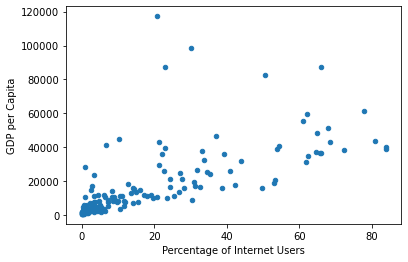

In [33]:
gdp_int_04.plot.scatter(x='Internet_Users_Pct',y='GDP_Per_Capita')
plt.xlabel('Percentage of Internet Users')
plt.ylabel('GDP per Capita');

b. 2009 Percent Using the Internet vs GDP Per Capita

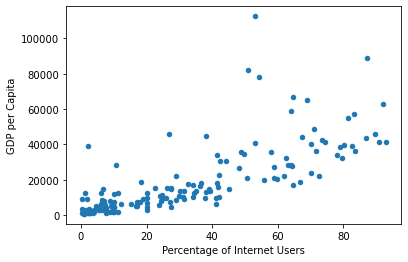

In [34]:
gdp_int_09.plot.scatter(x='Internet_Users_Pct',y='GDP_Per_Capita')
plt.xlabel('Percentage of Internet Users')
plt.ylabel('GDP per Capita');

c. 2014 Percent Using the Internet vs GDP Per Capita

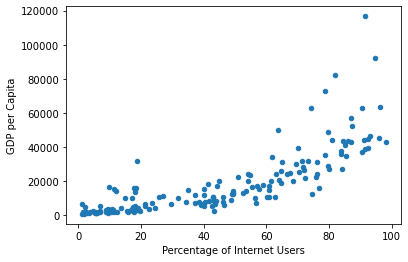

In [35]:
gdp_int_14.plot.scatter(x='Internet_Users_Pct',y='GDP_Per_Capita') 
plt.xlabel('Percentage of Internet Users')
plt.ylabel('GDP per Capita');

## 24. Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

As GDP increases, the pct of internet users tends to increase. The correlation looks stronger in 2014. 

## 25. Look at the distribution of gdp per capita values for 2014. Is it unimodal?

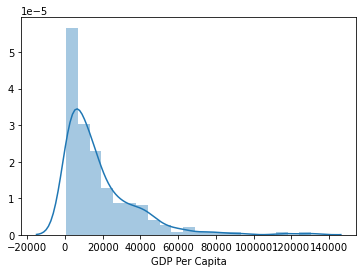

In [36]:
sns.distplot(gdp_int_14['GDP_Per_Capita'])
plt.xlabel('GDP Per Capita');


## 26. Look at the distribution of Internet Use for 2014. Is it unimodal?

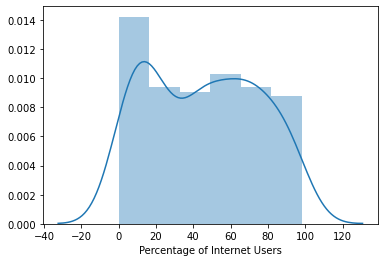

In [37]:
sns.distplot(gdp_int_14['Internet_Users_Pct'])
plt.xlabel('Percentage of Internet Users');

## 27. What are the top 5 countries in terms of internet use in 2014?

In [38]:
topfive_2014 = gdp_int_14.sort_values(by= 'Internet_Users_Pct', ascending = False)
topfive_2014 = topfive_2014.reset_index()
topfive_2014.head(5)

,index,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,2581,Iceland,2014,42774.888849,98.16
1,6774,Bermuda,2014,NaN,96.80
2,4530,Norway,2014,63328.259526,96.30
3,1404,Denmark,2014,45057.083449,95.99
4,6734,Andorra,2014,NaN,95.90


## 28. Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.

In [39]:
top_five_list = ['Iceland','Bermuda','Norway','Denmark','Andorra']
top_five_internet = years_04_09_14.query("Country in @top_five_list")
top_five_internet = top_five_internet.reset_index()
top_five_internet.head(16)

#my_list = ['2004','2009','2014']
#years_query = gdp_internet_df.query("Year in @my_list")
#years_query.head(5)
#top_5_internet = gdp_internet_df.loc[gdp_internet_df['Country'] == ['I
#top_5_internet.head(50)

,index,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,542,Bermuda,2009,57151.919132,83.250000
1,547,Bermuda,2004,55452.638880,60.990867
2,1404,Denmark,2014,45057.083449,95.990000
3,1409,Denmark,2009,43382.615688,86.840000
4,1414,Denmark,2004,43670.446201,80.930000
5,2581,Iceland,2014,42774.888849,98.160000
6,2586,Iceland,2009,41505.084834,93.000000
7,2591,Iceland,2004,38893.378798,83.880000
8,4530,Norway,2014,63328.259526,96.300000
9,4535,Norway,2009,62617.153609,92.080000


## 29. Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?

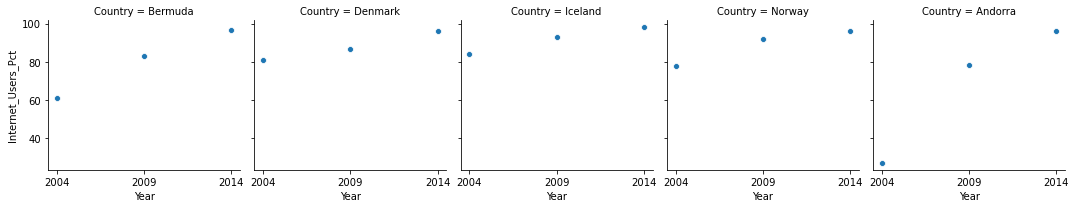

In [40]:
top_five_internet.Year = top_five_internet.Year.astype(int)
a = sns.FacetGrid(top_five_internet, col='Country')
a.map(sns.scatterplot,'Year','Internet_Users_Pct')
a.set(xticks=[2004, 2009, 2014])
a.add_legend();

## 30. Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

In [41]:
bottomfive_2014 = gdp_int_14.sort_values(by= 'Internet_Users_Pct', ascending = True).reset_index()
bottomfive_2014.head(5)

,index,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,6942,Dem. People's Rep. of Korea,2014,NaN,0.00
1,7001,Eritrea,2014,NaN,0.99
2,6044,Timor-Leste,2014,6466.737732,1.14
3,794,Burundi,2014,768.469837,1.38
4,7523,Somalia,2014,NaN,1.63


In [42]:
bottom_five_list = ["Dem. People's Rep. of Korea","Eritrea","Timor-Leste","Burundi","Somalia"]
bottom_five_internet = years_04_09_14.query("Country in @bottom_five_list")
bottom_five_internet = bottom_five_internet.reset_index()
bottom_five_internet.head(16)

,index,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,794,Burundi,2014,768.469837,1.380000
1,799,Burundi,2009,721.063140,0.900000
2,804,Burundi,2004,708.833720,0.349060
3,1722,Eritrea,2009,1950.533339,0.540000
4,1727,Eritrea,2004,2317.349879,NaN
5,6044,Timor-Leste,2014,6466.737732,1.140000
6,6049,Timor-Leste,2009,9275.529371,0.185252
7,6054,Timor-Leste,2004,4898.575839,NaN
8,6942,Dem. People's Rep. of Korea,2014,NaN,0.000000
9,6946,Dem. People's Rep. of Korea,2009,NaN,0.000000


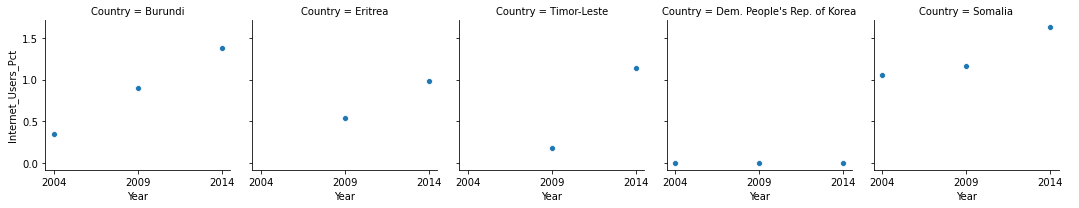

In [43]:
bottom_five_internet.Year = bottom_five_internet.Year.astype(int)
b = sns.FacetGrid(bottom_five_internet, col='Country')
b.map(sns.scatterplot,'Year','Internet_Users_Pct')
b.set(xticks=[2004, 2009, 2014])
b.add_legend();

In [44]:
#bottom_5_sort.Year = bottom_5_sort.Year.astype(int)
#bottom_5_sort = bottom_5_internet.sort_values('Year', ascending=True).reset_index()
#bottom_5_sort = bottom_5_sort.sort_values('Country', ascending=True).reset_index()
#bottom_5_sort.Year = bottom_5_sort.Year.astype(int)
#bottom_5_sort
#bottom_5_sort = bottom_5_internet.sort_values('Year', ascending=True).reset_index()
#bottom_5_sort = bottom_5_sort.sort_values('Country', ascending=True).reset_index()
#bottom_5_sort.Year = bottom_5_sort.Year.astype(int)
#bottom_5_sort
#f = sns.FacetGrid(bottom_5_sort, col='Country')
#f.map(sns.scatterplot,'Year','Internet_Users_Pct')
#f.set(xticks=[2004, 2009, 2014])
#f.add_legend()

## 31. Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

In [45]:
topfive_gdp14 = gdp_int_14.sort_values(by= 'GDP_Per_Capita', ascending = False)
topfive_gdp14 = topfive_gdp14.reset_index()
topfive_gdp14.head(5)

,index,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,3639,"Macao SAR, China",2014,130439.106674,NaN
1,5003,Qatar,2014,116693.507701,91.49
2,3610,Luxembourg,2014,92349.186429,94.67
3,5316,Singapore,2014,81965.361071,82.00
4,707,Brunei,2014,76448.593329,NaN


In [46]:
top_five_gdp_list = ["Macao SAR, China","Qatar","Luxembourg","Singapore","Brunei"]
top_five_gdp = years_04_09_14.query("Country in @top_five_gdp_list")
top_five_gdp = top_five_gdp.reset_index()
top_five_gdp.head(16)

,index,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,707,Brunei,2014,76448.593329,NaN
1,712,Brunei,2009,79485.001581,NaN
2,717,Brunei,2004,83963.238066,NaN
3,3610,Luxembourg,2014,92349.186429,94.670000
4,3615,Luxembourg,2009,89098.734264,87.310000
5,3620,Luxembourg,2004,87209.819367,65.880000
6,3639,"Macao SAR, China",2014,130439.106674,NaN
7,3644,"Macao SAR, China",2009,79955.986107,NaN
8,3649,"Macao SAR, China",2004,60791.976853,NaN
9,5003,Qatar,2014,116693.507701,91.490000


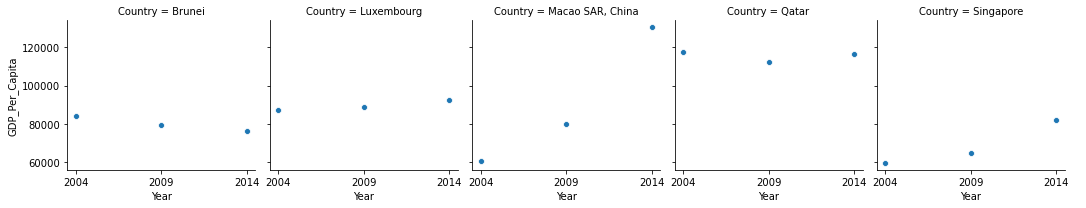

In [47]:
top_five_gdp.Year = top_five_gdp.Year.astype(int)
c = sns.FacetGrid(top_five_gdp, col='Country')
c.map(sns.scatterplot,'Year','GDP_Per_Capita')
c.set(xticks=[2004, 2009, 2014])
c.add_legend();

## 32. Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

In [48]:
bottomfive_gdp14 = gdp_int_14.sort_values(by= 'GDP_Per_Capita', ascending = True)
bottomfive_gdp14 = bottomfive_gdp14.reset_index()
bottomfive_gdp14.head(5)

,index,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,1014,Central African Republic,2014,672.681648,NaN
1,794,Burundi,2014,768.469837,1.38
2,1375,Dem. Rep. Congo,2014,784.872656,NaN
3,4414,Niger,2014,900.136918,1.95
4,3697,Malawi,2014,1142.530804,5.83


In [49]:
bottom_five_gdp_list = ["Central African Republic","Burundi","Dem. Rep. Congo","Niger","Malawi"]
bottom_five_gdp = years_04_09_14.query("Country in @bottom_five_gdp_list")
bottom_five_gdp.head(16)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
794,Burundi,2014,768.469837,1.380000
799,Burundi,2009,721.063140,0.900000
804,Burundi,2004,708.833720,0.349060
1014,Central African Republic,2014,672.681648,NaN
1019,Central African Republic,2009,949.551325,NaN
1024,Central African Republic,2004,848.689032,NaN
1375,Dem. Rep. Congo,2014,784.872656,NaN
1380,Dem. Rep. Congo,2009,636.875743,NaN
1385,Dem. Rep. Congo,2004,577.483297,NaN
3697,Malawi,2014,1142.530804,5.830000


C:\Users\18285\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


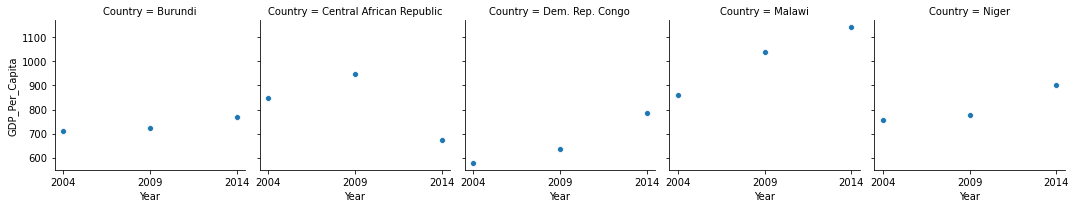

In [50]:
bottom_five_gdp.Year = bottom_five_gdp.Year.astype(int)
d = sns.FacetGrid(bottom_five_gdp, col='Country')
d.map(sns.scatterplot,'Year','GDP_Per_Capita')
d.set(xticks=[2004, 2009, 2014])
d.add_legend();

## 33. Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

In [ ]:
# CAR decrease in GDP per capita. "In 2013, a political coup saw intense sectarian violence and caused a 36 percent collapse in GDP. The protracted internal armed conflict has devastated the country since 2014 continuing to force people to flee their homes and causing a severe breakdown in basic social services. "

## Bonus. Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.